In [1]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
    !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
    !git fetch --all
    !git reset --hard origin/master

In [2]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
#     !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
#     !git pull

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import importlib
import tradestats
import pandas as pd
from datetime import datetime

In [5]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# import graphviz

In [6]:
importlib.reload(tradestats)
from tradestats import *

In [7]:
prices = loaddata_1D('AUDUSD_Candlestick_1_D_BID_03.08.2003-24.10.2021.csv')
# prices = loaddata_1D('EURUSD_Candlestick_1_D_BID_03.08.2003-24.10.2021.csv')

In [8]:
len(prices)

4753

In [9]:
importlib.reload(tradestats)
from tradestats import *
starttime = datetime.now()

maKey  = [3,5,7,30,35,40,45,60,80,100,120,140,160]
atrKey = [20]
# srsKey = [0]
dictList = []
colFeat = []
keyList = []
maDict   = ma2(prices, maKey,3,5,7)
atrDict  = atr(prices, atrKey)
# srsDict  = srs(prices, srsKey)
dictList.append(maDict.df); colFeat.append('ma'); keyList.append(maKey) 
dictList.append(atrDict.df); colFeat.append('atr'); keyList.append(atrKey) 
# dictList.append(srsDict.df); colFeat.append('srs'); keyList.append(srsKey) 

endtime = datetime.now()
print(str(endtime - starttime))

0:00:00.557994


In [10]:
# prices.dropna(inplace=True)
masterFrame = pd.DataFrame(index=prices.index)
masterFrame[['id','year','month','day','date','weekday','open','high','low','close','volume']] = prices[['id','year','month','day','date','weekday','open','high','low','close','volume']]   

In [11]:
for i in range(0,len(dictList)):#iteracja po funkcjach
    for j in keyList[i]: #iteracja po okresach
        for k in list(dictList[i][j]): #iteracja po kolumnach danej funkcji w okresie
            colID = colFeat[i] + str(j) + k
            masterFrame[colID] = dictList[i][j][k]

In [12]:
# masterFrame.to_csv(sep=';',path_or_buf='../Data/masterFrame.csv',date_format="%Y-%m-%d",index = False,na_rep='')

In [13]:
masterFrame = masterFrame.dropna()

In [14]:
masterFrame.tail(5)

,id,year,month,day,date,weekday,open,high,low,close,...,ma140SMAvs5_prev,ma140SMAvs7_prev,ma140SMAdiffseq_prev,ma160SMA_prev,ma160SMAdiffdiff_prev,ma160SMAvs3_prev,ma160SMAvs5_prev,ma160SMAvs7_prev,ma160SMAdiffseq_prev,atr20atr_prev
4748,4748,2021,10,18,2021-10-18 21:00:00,0,0.74146,0.74370,0.73781,0.74102,...,-0.012300,-0.014382,-5,0.752543,0.000026,-0.012240,-0.014523,-0.016605,-5,0.006553
4749,4749,2021,10,19,2021-10-19 21:00:00,1,0.74080,0.74851,0.74074,0.74715,...,-0.010800,-0.012772,-5,0.752395,0.000017,-0.010989,-0.013045,-0.015018,-5,0.006606
4750,4750,2021,10,20,2021-10-20 21:00:00,2,0.74715,0.75222,0.74647,0.75144,...,-0.008197,-0.010261,-5,0.752243,-0.000004,-0.008940,-0.010427,-0.012490,-5,0.006687
4751,4751,2021,10,21,2021-10-21 21:00:00,3,0.75128,0.75460,0.74581,0.74655,...,-0.005382,-0.007752,-5,0.752106,0.000015,-0.005569,-0.007544,-0.009915,-5,0.006611
4752,4752,2021,10,22,2021-10-22 21:00:00,4,0.74654,0.75118,0.74533,0.74631,...,-0.004231,-0.005943,-5,0.751905,-0.000064,-0.003525,-0.006325,-0.008038,-5,0.006588


In [15]:
importlib.reload(tradestats)
from tradestats import *
starttime = datetime.now()
atrperiod = 'atr20atr_prev'
sl = [0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
tp = [0.6,0.7,0.75,0.8,0.85,0.9,1]
tsl = [0,0.3,0.4,0.5,0.6,0.7]
# alltrades = preparetrades_brut_tsl(masterFrame,[1],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],[0.001,0.002,0.003,0.004,0.005,0.006],2015,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],2003,2021)
# alltrades = preparetrades_brut_tp(masterFrame,[-1,1],[0.5],[0.9],2020,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.3,0.4,0.5,0.6,0.7,0.8,0.9],[0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[1],[1,1.2,1.4,1.6,1.8,2,2.2],[1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2],2003,2021,atrperiod)
alltrades = preparetrades_brut_tsl(masterFrame,[1],sl,tp+[100],tsl,2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],[0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015],2003,2021,atrperiod)
# alltrades = preparetrades_brut_tp(masterFrame,[-1],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],[0.003,0.004,0.005,0.006,0.007,0.008,0.01,0.012,0.014],2003,2021,atrperiod)
endtime = datetime.now()
print(str(endtime - starttime))

0.5 : 0.6 : 0 : -12  open: 0
0.5 : 0.6 : 0.3 : -15  open: 1
0.5 : 0.6 : 0.4 : -16  open: 1
0.5 : 0.6 : 0.5 : -16  open: 1
0.5 : 0.6 : 0.6 : -22  open: 1
0.5 : 0.6 : 0.7 : -28  open: 1
0.5 : 0.7 : 0 : -12  open: 0
0.5 : 0.7 : 0.3 : -15  open: 1
0.5 : 0.7 : 0.4 : -16  open: 1
0.5 : 0.7 : 0.5 : -16  open: 1
0.5 : 0.7 : 0.6 : -22  open: 1
0.5 : 0.7 : 0.7 : -28  open: 1
0.5 : 0.75 : 0 : -13  open: 1
0.5 : 0.75 : 0.3 : -15  open: 1
0.5 : 0.75 : 0.4 : -16  open: 1
0.5 : 0.75 : 0.5 : -16  open: 1
0.5 : 0.75 : 0.6 : -22  open: 1
0.5 : 0.75 : 0.7 : -28  open: 1
0.5 : 0.8 : 0 : -13  open: 1
0.5 : 0.8 : 0.3 : -15  open: 2
0.5 : 0.8 : 0.4 : -16  open: 2
0.5 : 0.8 : 0.5 : -16  open: 2
0.5 : 0.8 : 0.6 : -22  open: 2
0.5 : 0.8 : 0.7 : -28  open: 2
0.5 : 0.85 : 0 : -13  open: 1
0.5 : 0.85 : 0.3 : -15  open: 2
0.5 : 0.85 : 0.4 : -16  open: 2
0.5 : 0.85 : 0.5 : -16  open: 2
0.5 : 0.85 : 0.6 : -22  open: 2
0.5 : 0.85 : 0.7 : -28  open: 2
0.5 : 0.9 : 0 : -13  open: 1
0.5 : 0.9 : 0.3 : -15  open: 2
0.5 : 0.

0.85 : 0.7 : 0.3 : -15  open: 1
0.85 : 0.7 : 0.4 : -16  open: 1
0.85 : 0.7 : 0.5 : -17  open: 1
0.85 : 0.7 : 0.6 : -24  open: 1
0.85 : 0.7 : 0.7 : -30  open: 1
0.85 : 0.75 : 0 : -14  open: 1
0.85 : 0.75 : 0.3 : -15  open: 1
0.85 : 0.75 : 0.4 : -16  open: 1
0.85 : 0.75 : 0.5 : -17  open: 1
0.85 : 0.75 : 0.6 : -24  open: 1
0.85 : 0.75 : 0.7 : -30  open: 1
0.85 : 0.8 : 0 : -14  open: 1
0.85 : 0.8 : 0.3 : -15  open: 2
0.85 : 0.8 : 0.4 : -21  open: 2
0.85 : 0.8 : 0.5 : -21  open: 2
0.85 : 0.8 : 0.6 : -24  open: 2
0.85 : 0.8 : 0.7 : -30  open: 2
0.85 : 0.85 : 0 : -17  open: 1
0.85 : 0.85 : 0.3 : -18  open: 2
0.85 : 0.85 : 0.4 : -23  open: 2
0.85 : 0.85 : 0.5 : -24  open: 2
0.85 : 0.85 : 0.6 : -28  open: 2
0.85 : 0.85 : 0.7 : -30  open: 2
0.85 : 0.9 : 0 : -17  open: 1
0.85 : 0.9 : 0.3 : -18  open: 2
0.85 : 0.9 : 0.4 : -23  open: 2
0.85 : 0.9 : 0.5 : -24  open: 2
0.85 : 0.9 : 0.6 : -28  open: 2
0.85 : 0.9 : 0.7 : -30  open: 2
0.85 : 1 : 0 : -17  open: 1
0.85 : 1 : 0.3 : -18  open: 2
0.85 : 1 :

In [17]:
importlib.reload(tradestats)
from tradestats import *
trades = cleartrades_brut(alltrades.copy(),False)
# trades,alltrades = preparetrades(masterFrame,[-1,1],[5],[13],[0.002],True)

trades_len:  1579056


In [19]:
#____________________________________________________________________________________________________________________
#
#
alltrades.head(2)

,id,year,month,day,date,weekday,open,high,low,close,...,tsl_val,stoploss,takeprofit,closeindex,tpcloseindex,closeprice,tpcloseprice,slindex,slprice,profit
0,162,2004,3,17,2004-03-17 22:00:00,2,0.74192,0.74355,0.7359,0.74081,...,0.0,0.735654,0.749439,163.0,163.0,0.749439,0.75308,-1.0,-1.0,75.189
1,163,2004,3,18,2004-03-18 22:00:00,3,0.74107,0.75308,0.7392,0.75065,...,0.0,0.734947,0.748417,163.0,163.0,0.748417,0.75308,-1.0,-1.0,73.473


In [20]:
def runstats42(alltrades,ma1,atrperiod,sl,tp,tsl,ma2=5):
    ma2 = str(ma2)
    runstats_ma_v42(alltrades,'ma'+ma1+'SMAdiffseq_prev', 'ma'+ma1+'SMAdiffdiff_prev', 'ma'+ma1+'SMAvs'+ma2+'_prev', 'ma'+ma2+'SMAdiffseq_prev', 'ma'+ma2+'SMAdiffdiff_prev', atrperiod,sl,tp,tsl,'x1')
    runstats_ma_v42(alltrades,'ma'+ma1+'SMAdiffseq_prev', 'ma'+ma1+'SMAdiffdiff_prev', 'ma'+ma1+'SMAvs'+ma2+'_prev', 'ma'+ma2+'SMAdiffseq_prev', 'ma'+ma2+'SMAdiffdiff_prev', atrperiod,sl,[100],[0],'x2')

    return 

def runstats_ma_v42(alltrades,a,b,sv,aa,bb,atr='atr140atr_prev',sl=[],tp=[],tsl=[],ff=''):
    conf   = {}
    params = {}

    params['tradetype'] = [2,[1]]
    params['sl'] =        [2,sl]
    params['tp'] =        [2,tp]
    params['tsl'] =       [2,tsl]
    params[atr]  =        [3,[-1000],[0.015]]
    params[a]    =        [0,[-5,1,2,3,4,5],[1,2,3,4,5,1000]]
    params[b]    =        [0,[-1000,0,1000],[-1000,0,1000]]
    params[sv]    =       [0,[-1000,0,1000],[-1000,0,1000]]
    params[aa]   =        [0,[-1000,0,1000],[-1000,0,1000]]
    params[bb]   =        [0,[-1000,0,1000],[-1000,0,1000]]
    conf['filename'] =    'ma_42_2003_2021_1_'+atr+'_'+sv+ff
    print(conf['filename'])
    stathyperparams2(alltrades,params,conf)
    return 

In [ ]:
# from joblib import Parallel, delayed
importlib.reload(tradestats)
from tradestats import *
# for i in [10,14,20,30,40]:
for i in [20]:
    atrperiod = 'atr'+str(i)+'atr_prev'
    runstats42(alltrades,'30',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'35',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'40',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'45',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'60',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'80',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'100',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'120',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'140',atrperiod,sl,tp,tsl,5)
    runstats42(alltrades,'160',atrperiod,sl,tp,tsl,5)
    
# maKey  = [3,5,7,30,35,40,45,60,80,100,120,140,160]   

ii 0
           tradetype      1
                  sl   0.75
                  tp   0.75
                 tsl    0.5
       atr20atr_prev  -1000  0.015
 ma35SMAdiffseq_prev     -5   1000
ma35SMAdiffdiff_prev  -1000      0
     ma35SMAvs3_prev      0   1000
  ma3SMAdiffseq_prev  -1000   1000
 ma3SMAdiffdiff_prev  -1000      0
{'ii': 0, 'c': 770, 'cu': 436, 'cd': 334, 'p_sm': 9631.81, 'maxp': 9806.296875, 'maxd2': -750.2462499999983, 'mu': 0, 'md': 0, 'avgsl': 63.08942045454539, 'fx': '{}', 'r': 152.66917861354452, 'd': -11.891791755172884, 'rd2': 13.070770930211276}


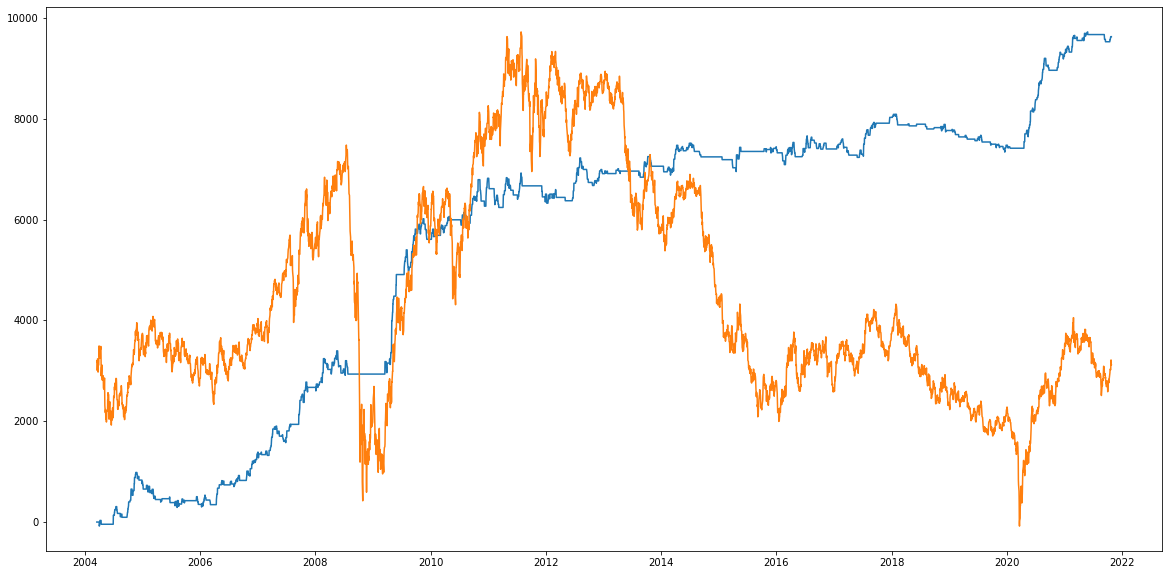

In [21]:
fxs = [
'{""tradetype"": [2, 1], ""sl"": [2, 0.75], ""tp"": [2, 0.75], ""tsl"": [2, 0.5], ""atr20atr_prev"": [3, -1000, 0.015], ""ma35SMAdiffseq_prev"": [0, -5, 1000], ""ma35SMAdiffdiff_prev"": [0, -1000, 0], ""ma35SMAvs3_prev"": [3, 0, 1000], ""ma3SMAdiffseq_prev"": [3, -1000, 1000], ""ma3SMAdiffdiff_prev"": [0, -1000, 0]}'
]    
sub = calcandplot(alltrades,fxs) 